In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

import keras
import skimage.io as io

In [2]:
# CNN model

INPUT_SHAPE = (224, 224, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928 

In [3]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[3].name, filters.shape)


batch_normalization (3, 3, 3, 64)


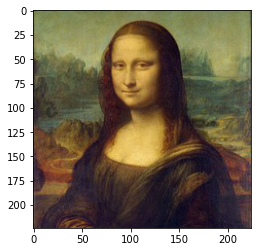

In [4]:
from PIL import Image
img = Image.open('images/einstein_mona_lisa/monalisa/monalisa_original.jpg')
new_image = img.resize((224, 224))
new_image = np.array(new_image)

plt.imshow(new_image)


(224, 224, 3)
(1, 224, 224, 3)


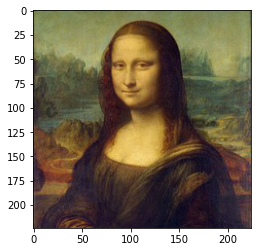

In [5]:
print(new_image.shape)

new_image = new_image.reshape((1,224,224,3))

print(new_image.shape)

plt.imshow(new_image[0])

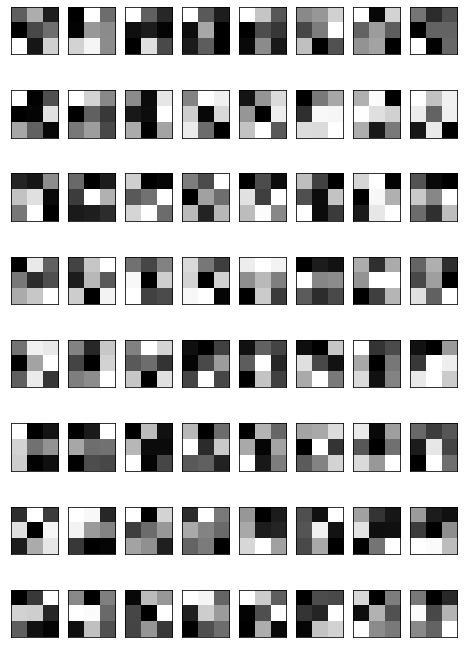

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 225ms/step


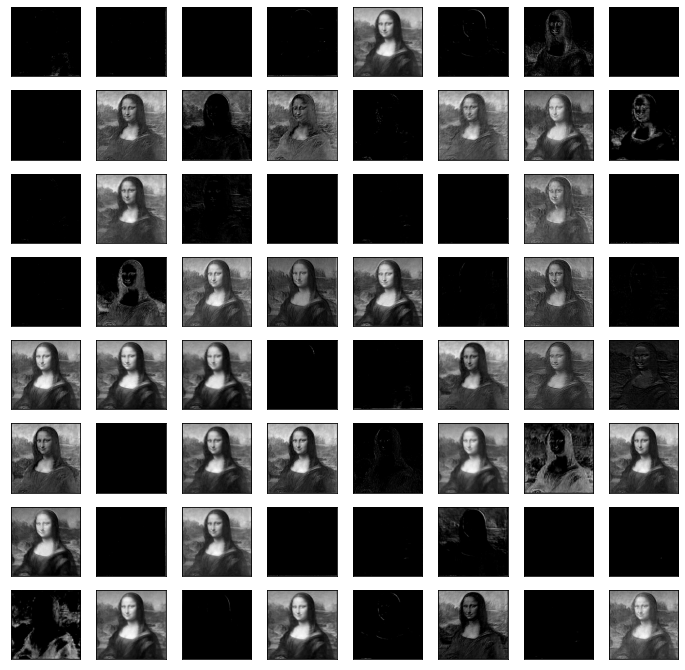

In [34]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(int(n_filters)):
    f = filters[:, :, :, i]
    fig1 =plt.subplot(rows, columns, i+1)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

# Generate feature output by predicting on the input image
feature_output = model_short.predict(new_image)

columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(np.array(ftr[:, :, i-1]), cmap='gray')
        #pos += 1
    plt.show()


1/1 [==============================] - 0s 102ms/step


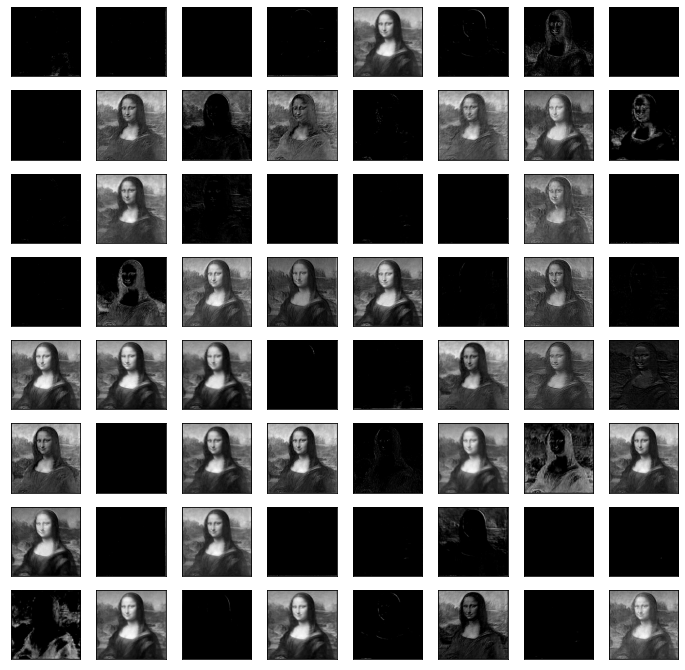

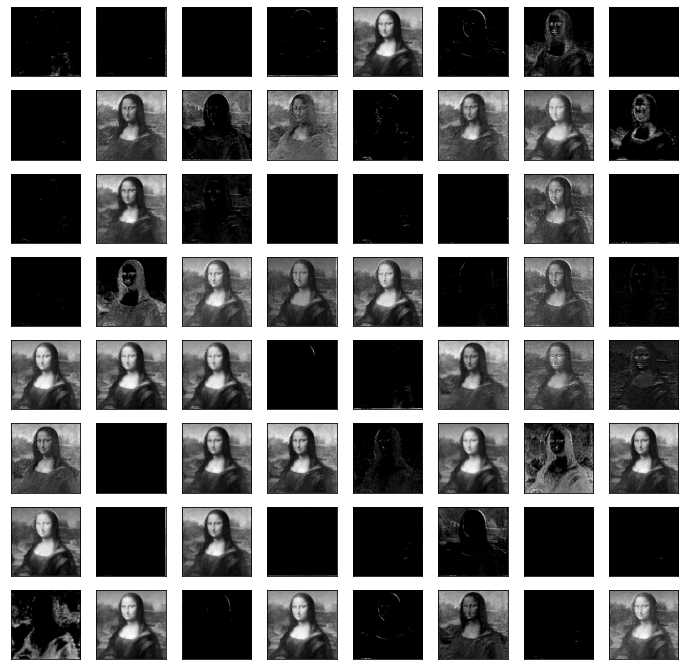

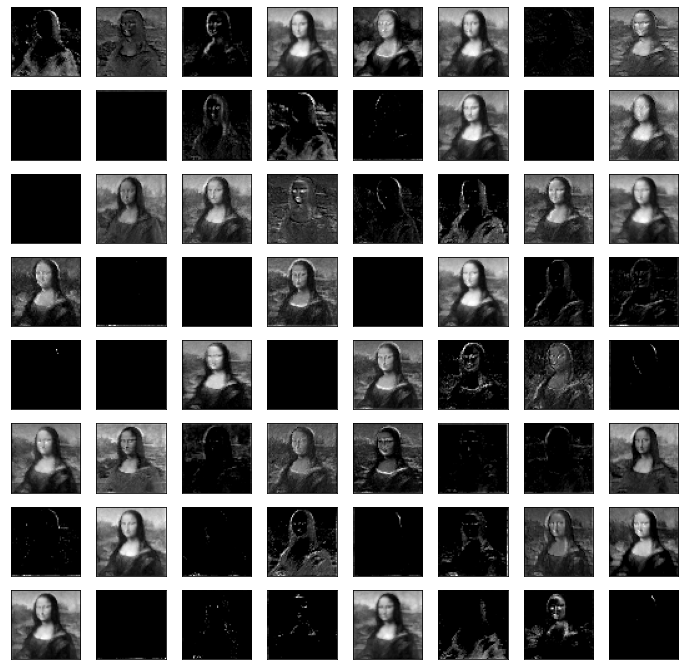

In [21]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
#print(model_short.summary())

# Generate feature output by predicting on the input image
feature_output = model_short.predict(new_image)

columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()



1/1 [==============================] - 0s 302ms/step


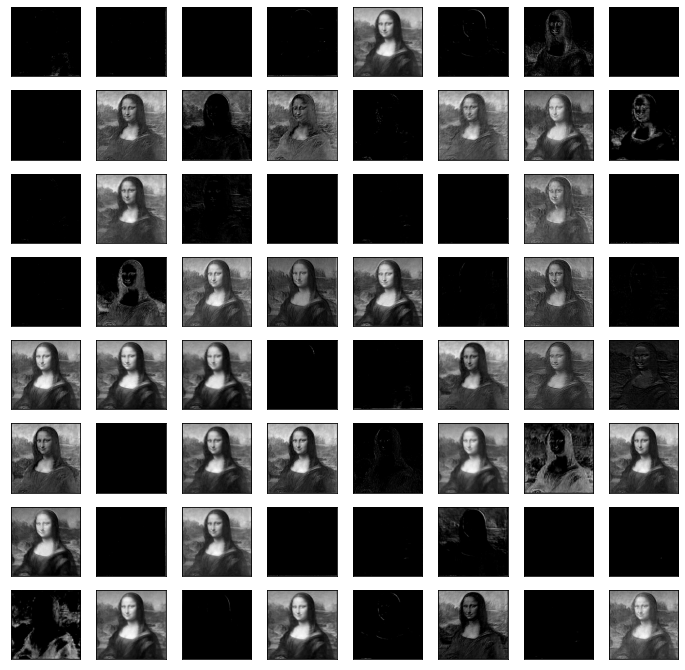

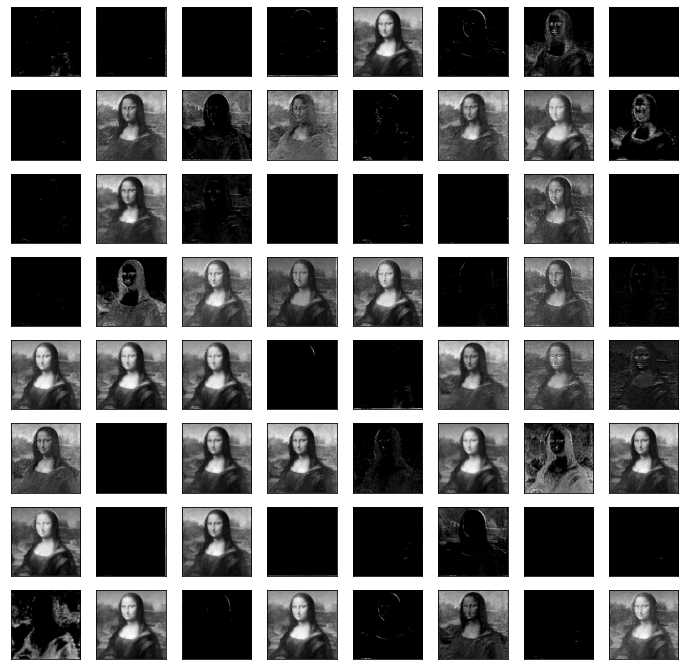

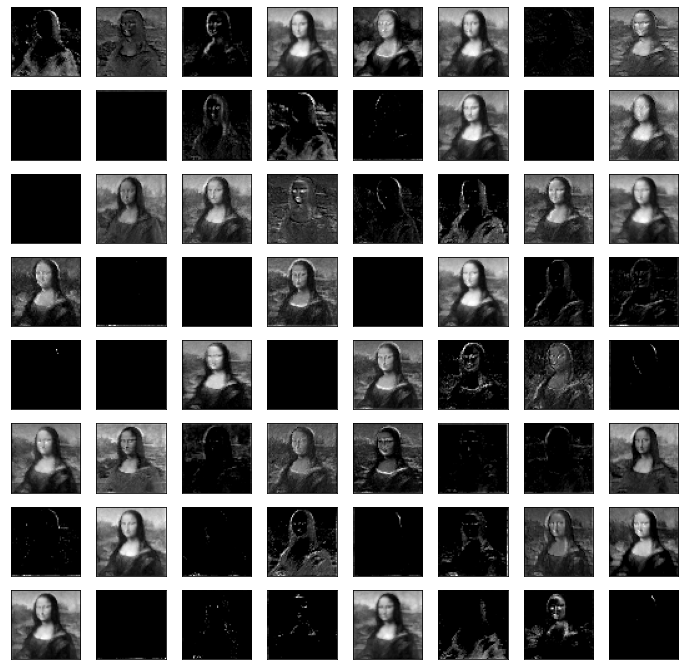

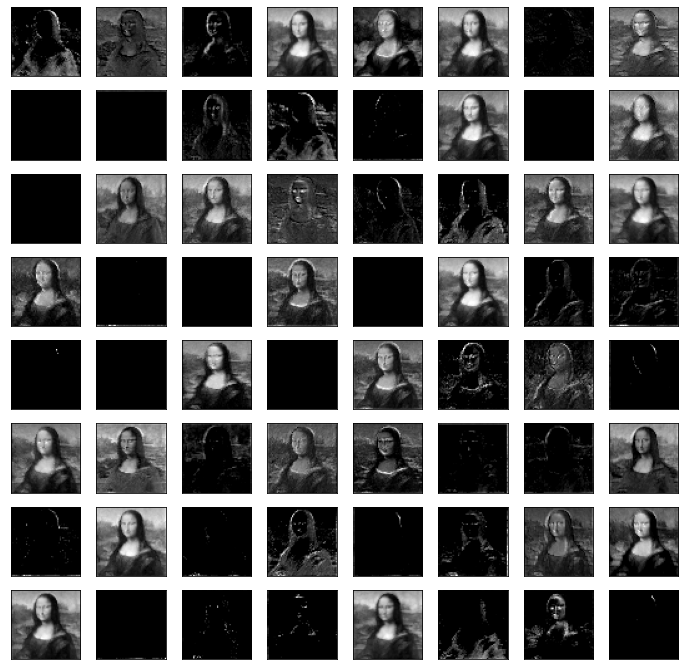

In [10]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1, 3, 6, 8]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
#print(model_short.summary())

# Generate feature output by predicting on the input image
feature_output = model_short.predict(new_image)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()



In [11]:
print(ftr.shape)

(1, 56, 56, 64)
